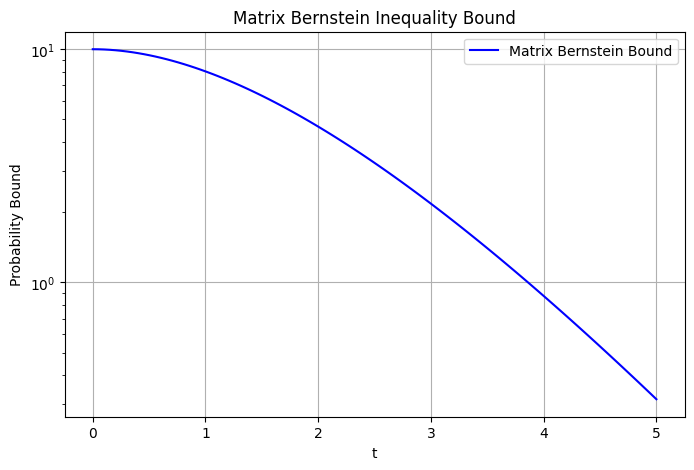

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_matrices(n, d, R):
    """Generate n independent d x d random matrices with bounded norm R."""
    X_matrices = [np.random.uniform(-R, R, (d, d)) for _ in range(n)]
    return X_matrices

def compute_variance_parameter(X_matrices):
    """Compute the matrix variance parameter."""
    n = len(X_matrices)
    d = X_matrices[0].shape[0]
    sum_xxt = sum(np.dot(X, X.T) for X in X_matrices) / n
    sum_xtx = sum(np.dot(X.T, X) for X in X_matrices) / n
    sigma_squared = max(np.linalg.norm(sum_xxt, ord=2), np.linalg.norm(sum_xtx, ord=2))
    return sigma_squared

def matrix_bernstein_bound(t, sigma_squared, R, d):
    """Compute the probability bound given by the Bernstein inequality."""
    return 2 * d * np.exp(-t**2 / (2 * (sigma_squared + R * t / 3)))

# Parameters
n = 100  # Number of matrices
d = 5    # Dimension of matrices
R = 1    # Bound on spectral norm

t_values = np.linspace(0, 5, 100)  # Range of t values for visualization

# Generate matrices and compute variance parameter
X_matrices = generate_random_matrices(n, d, R)
sigma_squared = compute_variance_parameter(X_matrices)

# Compute probability bound for different t values
prob_bounds = [matrix_bernstein_bound(t, sigma_squared, R, d) for t in t_values]

# Plot the probability bound
plt.figure(figsize=(8, 5))
plt.plot(t_values, prob_bounds, label='Matrix Bernstein Bound', color='blue')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Probability Bound')
plt.title('Matrix Bernstein Inequality Bound')
plt.legend()
plt.grid()
plt.show()


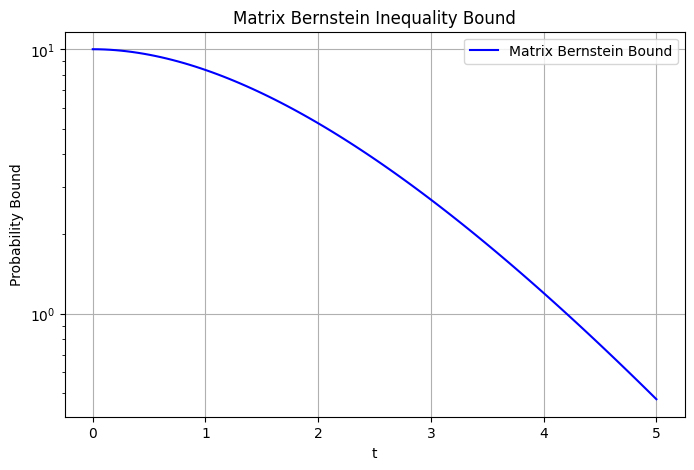

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def generate_random_matrices(n, d, R):
    """Generate n independent d x d random matrices based on graph edges with zero-mean Gaussian entries."""
    X_matrices = []
    for _ in range(n):
        G = nx.erdos_renyi_graph(d, 0.5)  # Generate a random graph
        X = np.zeros((d, d))
        for i, j in G.edges():
            value = np.random.normal(0, R)  # Zero-mean Gaussian distribution
            X[i, j] = value
            X[j, i] = value  # Ensure symmetry
        X_matrices.append(X)
    return X_matrices

def compute_variance_parameter(X_matrices):
    """Compute the matrix variance parameter."""
    n = len(X_matrices)
    d = X_matrices[0].shape[0]
    sum_xxt = sum(np.dot(X, X.T) for X in X_matrices) / n
    sum_xtx = sum(np.dot(X.T, X) for X in X_matrices) / n
    sigma_squared = max(np.linalg.norm(sum_xxt, ord=2), np.linalg.norm(sum_xtx, ord=2))
    return sigma_squared

def matrix_bernstein_bound(t, sigma_squared, R, d):
    """Compute the probability bound given by the Bernstein inequality."""
    return 2 * d * np.exp(-t**2 / (2 * (sigma_squared + R * t / 3)))

# Parameters
n = 100  # Number of matrices
d = 5    # Dimension of matrices
R = 1    # Standard deviation for Gaussian entries

t_values = np.linspace(0, 5, 100)  # Range of t values for visualization

# Generate matrices and compute variance parameter
X_matrices = generate_random_matrices(n, d, R)
sigma_squared = compute_variance_parameter(X_matrices)

# Compute probability bound for different t values
prob_bounds = [matrix_bernstein_bound(t, sigma_squared, R, d) for t in t_values]

# Plot the probability bound
plt.figure(figsize=(8, 5))
plt.plot(t_values, prob_bounds, label='Matrix Bernstein Bound', color='blue')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Probability Bound')
plt.title('Matrix Bernstein Inequality Bound')
plt.legend()
plt.grid()
plt.show()


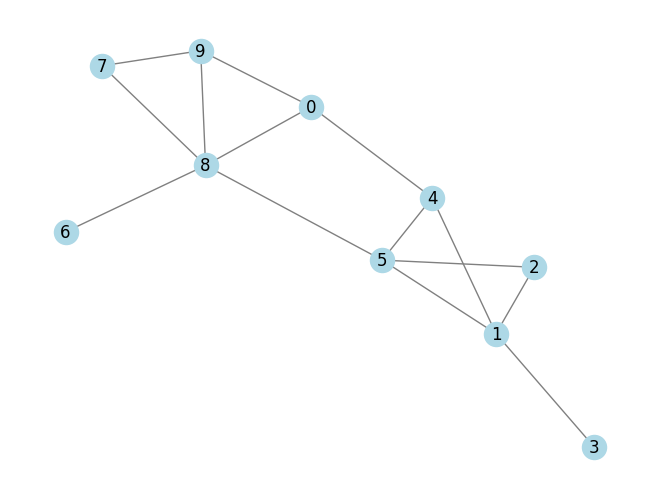

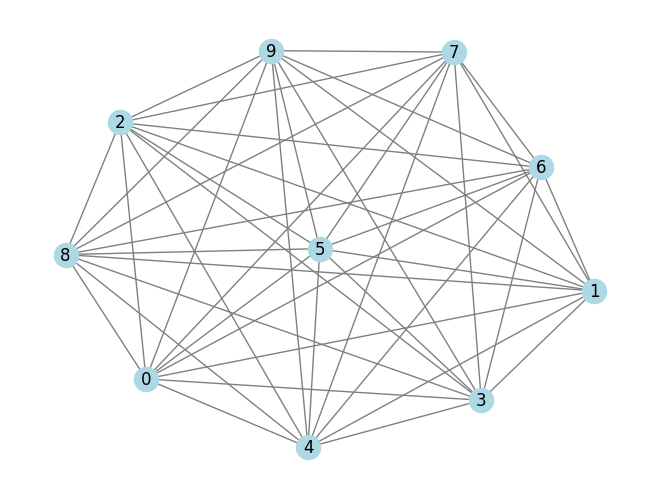

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10  # Number of nodes
p = 0.2 # Probability of edge creation

# Generate Erdős–Rényi graph using G(n, p)
G = nx.erdos_renyi_graph(n, p)

# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()


# Generate complete graph
G = nx.complete_graph(n)

# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

#  Gaussian Matrices Series

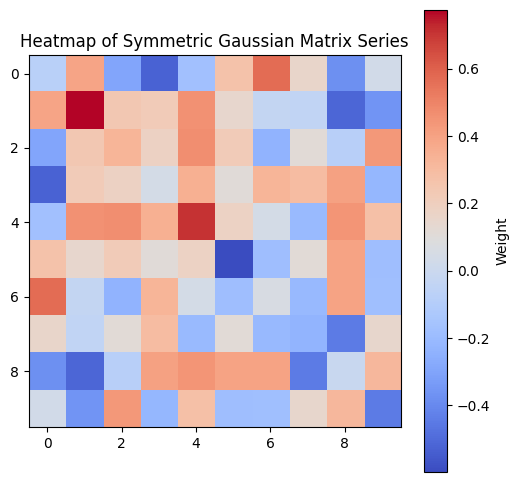

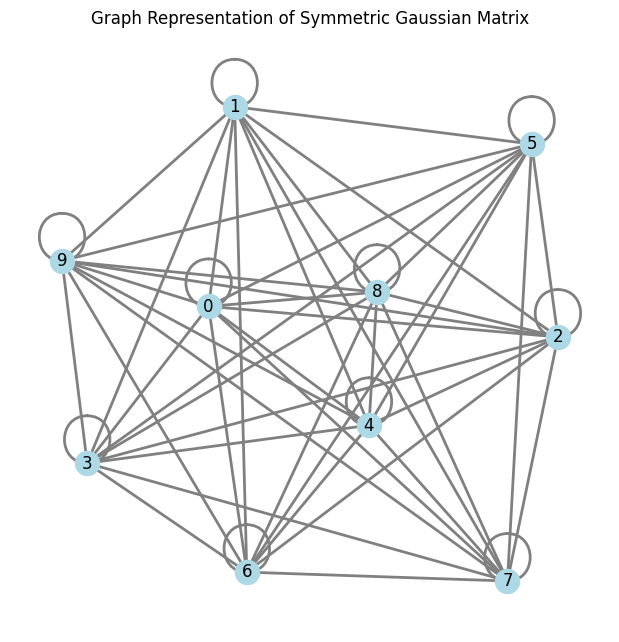

Degrees of Nodes: {0: 2.9326071741084654, 1: 3.953913066300824, 2: 2.91770261903383, 3: 2.715658126722201, 4: 4.004894257223375, 5: 2.9930216396277176, 6: 2.295695416259188, 7: 2.1924881392611706, 8: 3.399260446881724, 9: 3.035139877873198}
Eigenvalues of S_n: [ 1.68474613  1.37670394  0.9046892  -1.49371403 -1.19085317  0.38168577
 -0.69597637  0.10999238 -0.24125966 -0.27858641]


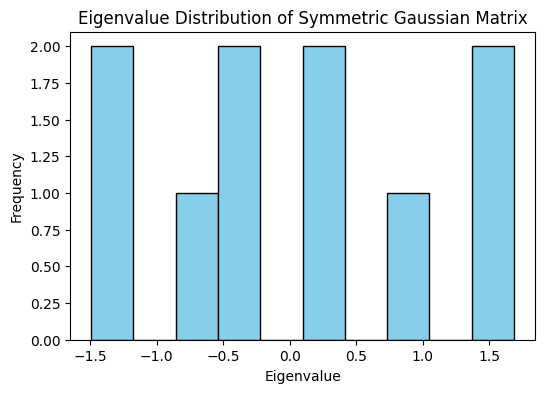

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10  # Matrix size (number of nodes)
m = 5   # Number of Gaussian matrices in the series
sigma = 1.0  # Standard deviation of Gaussian entries

# Generate m symmetric Gaussian matrices and sum them
S_n = np.zeros((n, n))  # Initialize sum matrix
for _ in range(m):
    A = np.random.normal(0, sigma, (n, n))  # Generate random Gaussian matrix
    A = (A + A.T) / 2  # Make it symmetric
    S_n += A  # Accumulate into sum

# Normalize (optional, to keep values in a reasonable range)
S_n /= m

# Convert the matrix into a graph (using absolute values for weights)
G = nx.from_numpy_array(np.abs(S_n))  # NetworkX graph

# Plot adjacency matrix as heatmap
plt.figure(figsize=(6,6))
plt.imshow(S_n, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Weight")
plt.title("Heatmap of Symmetric Gaussian Matrix Series")
plt.show()

# Draw the graph with weighted edges
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G)  # Compute node positions
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", width=2)
plt.title("Graph Representation of Symmetric Gaussian Matrix")
plt.show()

# Compute and print basic graph statistics
degrees = dict(G.degree(weight='weight'))
print("Degrees of Nodes:", degrees)

# Compute and display the eigenvalues of S_n
eigenvalues = np.linalg.eigvals(S_n)
print("Eigenvalues of S_n:", eigenvalues)

# Plot eigenvalue distribution
plt.figure(figsize=(6,4))
plt.hist(eigenvalues, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Eigenvalue")
plt.ylabel("Frequency")
plt.title("Eigenvalue Distribution of Symmetric Gaussian Matrix")
plt.show()


# Rademacher Matrices Series

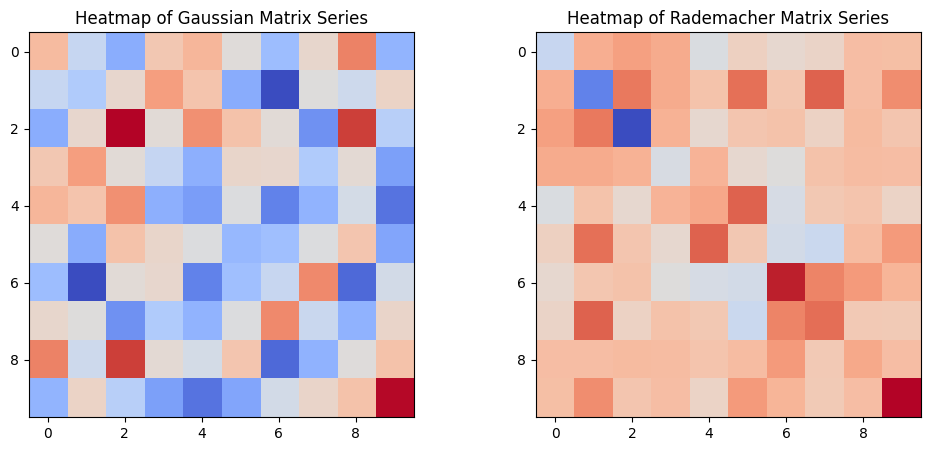

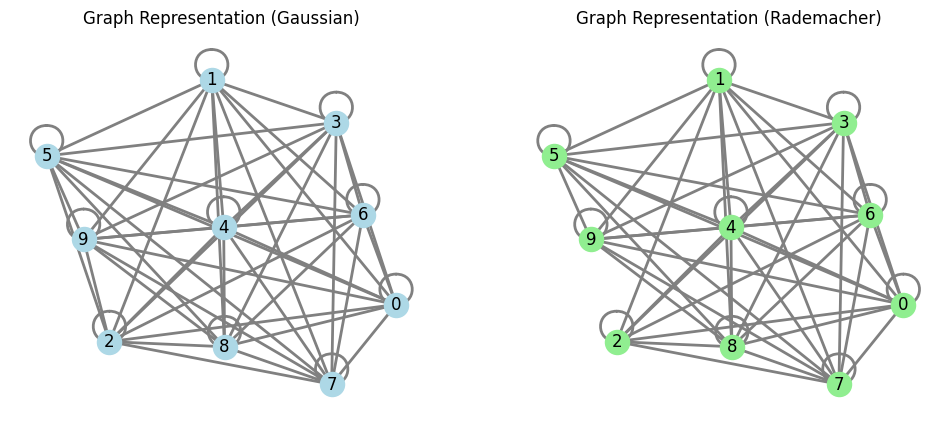

Degrees of Nodes (Gaussian): {0: 2.450199638479403, 1: 2.0729148887045064, 2: 3.771641024228695, 3: 1.7950614650870556, 4: 3.01276931689709, 5: 1.9774157105174097, 6: 2.5540324500226887, 7: 1.8156224173787412, 8: 2.6145912005146585, 9: 3.341718316304498}
Degrees of Nodes (Rademacher): {0: 1.896967025454308, 1: 3.71378232526841, 2: 3.303357730041978, 3: 1.5364807200812938, 4: 1.7106439920844883, 5: 2.0416870589324345, 6: 2.9255122705540746, 7: 2.2812285858159225, 8: 0.9635577220174222, 9: 2.3428377774574995}


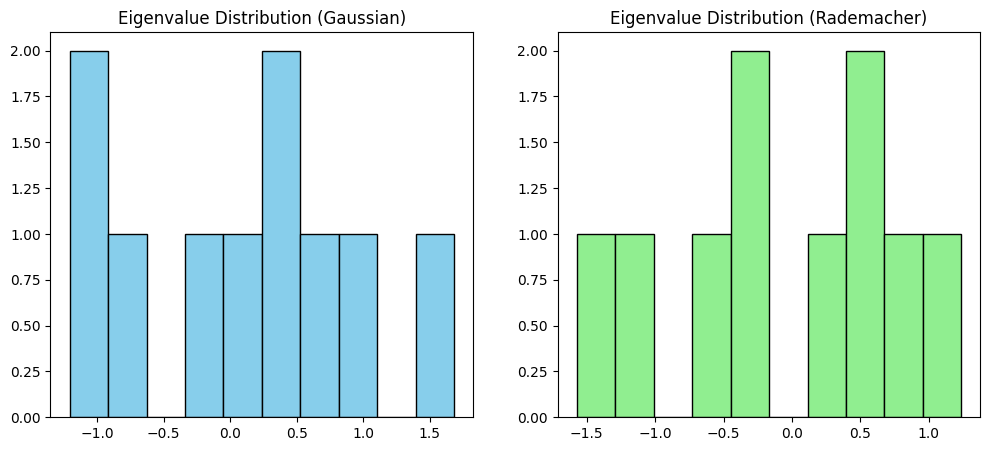

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10   # Matrix size (number of nodes)
m = 5    # Number of matrices in the series
sigma = 1.0  # Standard deviation of Gaussian entries

# Initialize sum matrices
S_gaussian = np.zeros((n, n))
S_rademacher = np.zeros((n, n))

# Generate and sum symmetric Gaussian and Rademacher matrices
for _ in range(m):
    # Gaussian Matrix (Symmetric)
    A_gaussian = np.random.normal(0, sigma, (n, n))
    A_gaussian = (A_gaussian + A_gaussian.T) / 2  # Make it symmetric
    S_gaussian += A_gaussian
    
    # Rademacher Matrix (Symmetric)
    A_fixed = np.random.normal(0, sigma, (n, n))  # Fixed matrix
    A_fixed = (A_fixed + A_fixed.T) / 2
    epsilon = np.random.choice([-1, 1], size=(n, n))  # Rademacher variables
    epsilon = (epsilon + epsilon.T) / 2  # Ensure symmetry
    S_rademacher += epsilon * A_fixed  # Element-wise multiplication

# Normalize
S_gaussian /= m
S_rademacher /= m

# Convert to graphs
G_gaussian = nx.from_numpy_array(np.abs(S_gaussian))
G_rademacher = nx.from_numpy_array(np.abs(S_rademacher))

# Plot Heatmaps
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(S_gaussian, cmap='coolwarm', interpolation='nearest')
axs[0].set_title("Heatmap of Gaussian Matrix Series")
axs[1].imshow(S_rademacher, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Heatmap of Rademacher Matrix Series")
plt.show()

# Draw Graphs
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pos = nx.spring_layout(G_gaussian)
nx.draw(G_gaussian, pos, with_labels=True, node_color="lightblue", edge_color="gray", width=2, ax=axs[0])
axs[0].set_title("Graph Representation (Gaussian)")

nx.draw(G_rademacher, pos, with_labels=True, node_color="lightgreen", edge_color="gray", width=2, ax=axs[1])
axs[1].set_title("Graph Representation (Rademacher)")
plt.show()

# Compute and print basic graph statistics
degrees_gaussian = dict(G_gaussian.degree(weight='weight'))
degrees_rademacher = dict(G_rademacher.degree(weight='weight'))
print("Degrees of Nodes (Gaussian):", degrees_gaussian)
print("Degrees of Nodes (Rademacher):", degrees_rademacher)

# Compute and display eigenvalues
eigen_gaussian = np.linalg.eigvals(S_gaussian)
eigen_rademacher = np.linalg.eigvals(S_rademacher)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(eigen_gaussian, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title("Eigenvalue Distribution (Gaussian)")

axs[1].hist(eigen_rademacher, bins=10, color='lightgreen', edgecolor='black')
axs[1].set_title("Eigenvalue Distribution (Rademacher)")
plt.show()


#  Skew-symmetric Matrices Series

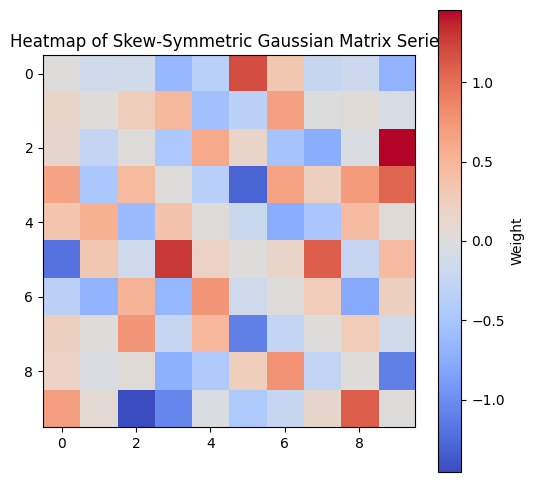

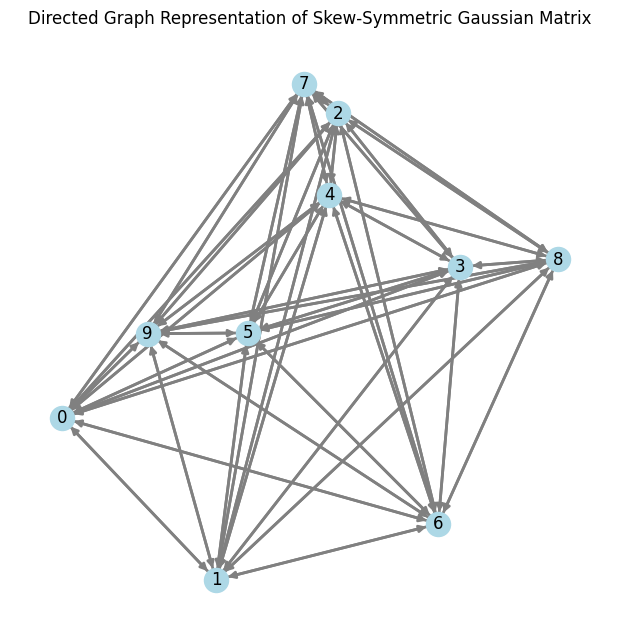

Eigenvalues of Skew-Symmetric Matrix: [ 1.11022302e-16+2.89807946j  1.11022302e-16-2.89807946j
 -5.72458747e-17+2.25987791j -5.72458747e-17-2.25987791j
 -7.97972799e-17+1.44777401j -7.97972799e-17-1.44777401j
  5.55111512e-17+0.40372823j  5.55111512e-17-0.40372823j
 -8.37004077e-17+0.02761739j -8.37004077e-17-0.02761739j]


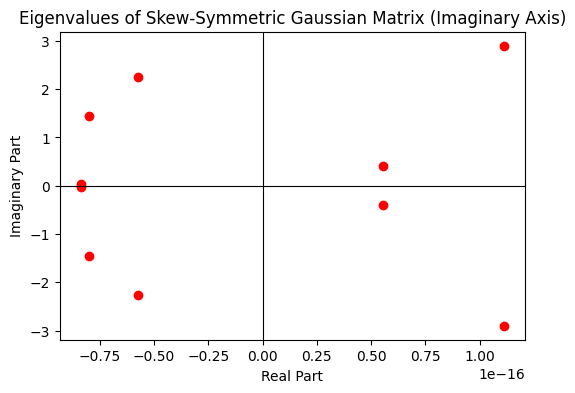

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10  # Matrix size (number of nodes)
m = 5   # Number of Gaussian matrices in the series
sigma = 1.0  # Standard deviation of Gaussian entries

# Initialize sum matrix
S_skew = np.zeros((n, n))

# Generate and sum skew-symmetric Gaussian matrices
for _ in range(m):
    M = np.random.normal(0, sigma, (n, n))  # Random Gaussian matrix
    A_skew = M - M.T  # Ensure skew-symmetry
    S_skew += A_skew

# Normalize
S_skew /= m

# Convert to directed graph (as skew-symmetric matrix represents directed edges)
G_skew = nx.from_numpy_array(S_skew, create_using=nx.DiGraph)

# Plot Heatmap
plt.figure(figsize=(6,6))
plt.imshow(S_skew, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Weight")
plt.title("Heatmap of Skew-Symmetric Gaussian Matrix Series")
plt.show()

# Draw Directed Graph
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G_skew)  # Compute node positions
nx.draw(G_skew, pos, with_labels=True, node_color="lightblue", edge_color="gray", width=2, arrows=True)
plt.title("Directed Graph Representation of Skew-Symmetric Gaussian Matrix")
plt.show()

# Compute and print eigenvalues
eigenvalues = np.linalg.eigvals(S_skew)
print("Eigenvalues of Skew-Symmetric Matrix:", eigenvalues)

# Plot Eigenvalue Distribution (Imaginary Axis)
plt.figure(figsize=(6,4))
plt.scatter(eigenvalues.real, eigenvalues.imag, color='red', marker='o')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues of Skew-Symmetric Gaussian Matrix (Imaginary Axis)")
plt.show()


#  Tropp's Matrix Bernstein Inequality

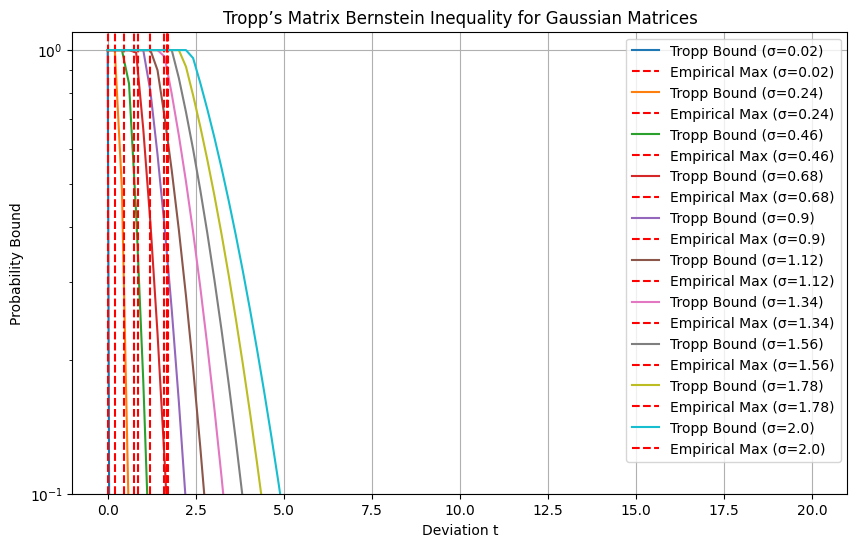

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian random matrix and compute its spectral norm
def compute_spectral_norm(m, n, sigma):
    A = np.random.normal(0, sigma, (m, n))  # Generate m x n Gaussian matrix
    spectral_norm = np.linalg.norm(A, ord=2)  # Compute spectral norm (largest singular value)
    return spectral_norm

# Parameters
m, n = 50, 50  # Matrix dimensions
sigma_values = np.linspace(0.02, 2, 10)  # Different standard deviations for Gaussian distribution
t_values = np.linspace(0, 20, 100)  # Range of t-values to evaluate probability bounds

# Theoretical bound from Tropp's inequality
def tropp_bound(t, sigma, m, n):
    expected_bound = sigma * (np.sqrt(m) + np.sqrt(n))
    probability = 2 * np.exp(-t**2 / (2 * sigma**2))
    return expected_bound, probability

# Run multiple trials to empirically check Tropp's bound
num_trials = 1000
spectral_norms = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        norm_val = compute_spectral_norm(m, n, sigma)
        spectral_norms[sigma].append(norm_val)

# Plot empirical vs theoretical results
plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    expected_bound, prob_values = tropp_bound(t_values, sigma, m, n)
    
    # Filter probability values to be between 1e-5 and 1
    prob_values = np.clip(prob_values, 1e-5, 1)
    
    empirical_max = np.max(spectral_norms[sigma])  # Empirical max spectral norm

    # Plot the theoretical bound
    plt.plot(t_values, prob_values, label=f"Tropp Bound (σ={sigma})")

    # Plot empirical result as a vertical line
    plt.axvline(empirical_max - expected_bound, color='r', linestyle='--', 
                label=f"Empirical Max (σ={sigma})")

plt.yscale('log')  # Log scale for probability
plt.ylim(1e-1, 1.1)  # Limit probability axis to [1e-5, 1]
plt.xlabel("Deviation t")
plt.ylabel("Probability Bound")
plt.title("Tropp’s Matrix Bernstein Inequality for Gaussian Matrices")
plt.legend()
plt.grid()
plt.show()


# tail decay  of a gaussian distribution

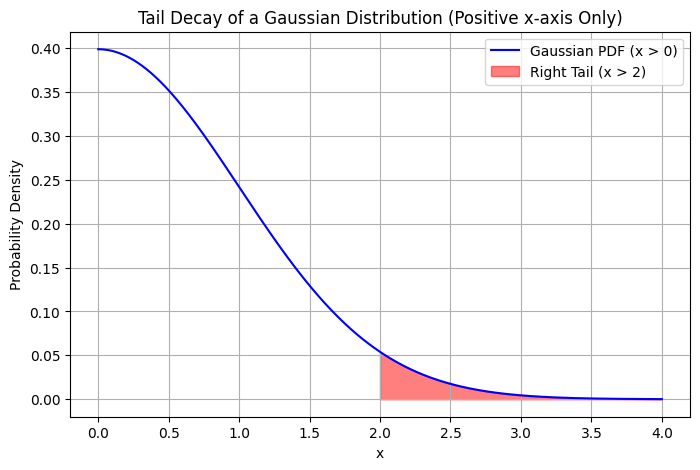

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mu = 0      # Mean
sigma = 1   # Standard deviation

# Define the range for positive x-values only
x = np.linspace(0, 4, 500)
y = norm.pdf(x, mu, sigma)  # Compute the Gaussian PDF

# Define the right tail region (x > 2)
x_tail_right = np.linspace(2, 4, 200)
y_tail_right = norm.pdf(x_tail_right, mu, sigma)

# Plot the Gaussian distribution for x > 0
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Gaussian PDF (x > 0)", color="blue")

# Highlight the right tail region
plt.fill_between(x_tail_right, y_tail_right, color="red", alpha=0.5, label="Right Tail (x > 2)")

# Labels and title
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Tail Decay of a Gaussian Distribution (Positive x-axis Only)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


#  Matrix Bernstein Inequality

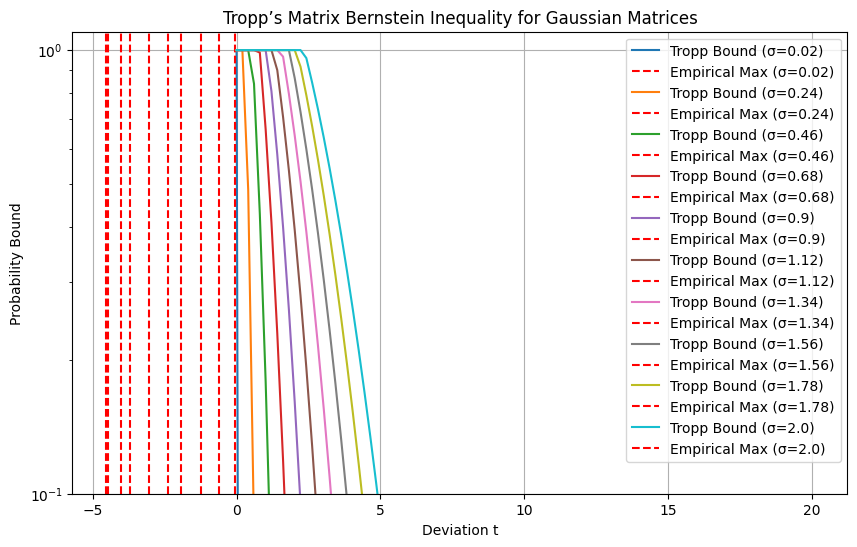

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Function to generate a Gaussian random matrix based on graph edges and compute its spectral norm
def compute_spectral_norm_from_graph(n, p, sigma):
    G = nx.erdos_renyi_graph(n, p)  # Generate a random graph
    A = np.zeros((n, n))
    for i, j in G.edges():
        value = np.random.normal(0, sigma)  # Zero-mean Gaussian distribution
        A[i, j] = value
        A[j, i] = value  # Ensure symmetry
    spectral_norm = np.linalg.norm(A, ord=2)  # Compute spectral norm (largest singular value)
    return spectral_norm

# Parameters
n = 50  # Number of nodes (matrix dimensions)
p = 0.5  # Probability of edge creation
sigma_values = np.linspace(0.02, 2, 10)  # Different standard deviations for Gaussian distribution
t_values = np.linspace(0, 20, 100)  # Range of t-values to evaluate probability bounds

# Theoretical bound from Tropp's inequality
def tropp_bound(t, sigma, n):
    expected_bound = sigma * (2 * np.sqrt(n))
    probability = 2 * np.exp(-t**2 / (2 * sigma**2))
    return expected_bound, probability

# Run multiple trials to empirically check Tropp's bound
num_trials = 1000
spectral_norms = {sigma: [] for sigma in sigma_values}

for sigma in sigma_values:
    for _ in range(num_trials):
        norm_val = compute_spectral_norm_from_graph(n, p, sigma)
        spectral_norms[sigma].append(norm_val)

# Plot empirical vs theoretical results
plt.figure(figsize=(10, 6))

for sigma in sigma_values:
    expected_bound, prob_values = tropp_bound(t_values, sigma, n)
    
    # Filter probability values to be between 1e-5 and 1
    prob_values = np.clip(prob_values, 1e-5, 1)
    
    empirical_max = np.max(spectral_norms[sigma])  # Empirical max spectral norm

    # Plot the theoretical bound
    plt.plot(t_values, prob_values, label=f"Tropp Bound (σ={sigma})")

    # Plot empirical result as a vertical line
    plt.axvline(empirical_max - expected_bound, color='r', linestyle='--', 
                label=f"Empirical Max (σ={sigma})")

plt.yscale('log')  # Log scale for probability
plt.ylim(1e-1, 1.1)  # Limit probability axis to [1e-5, 1]
plt.xlabel("Deviation t")
plt.ylabel("Probability Bound")
plt.title("Tropp’s Matrix Bernstein Inequality for Gaussian Matrices")
plt.legend()
plt.grid()
plt.show()

#  Bound of Random Geometric Graphs

Radius: 0.3, Average rho: 20.699203002498333
Radius: 0.39999999999999997, Average rho: 9.667429102382597
Radius: 0.5, Average rho: 6.150181918639723
Radius: 0.6, Average rho: 4.08066029871014
Radius: 0.7, Average rho: 2.87472127976688


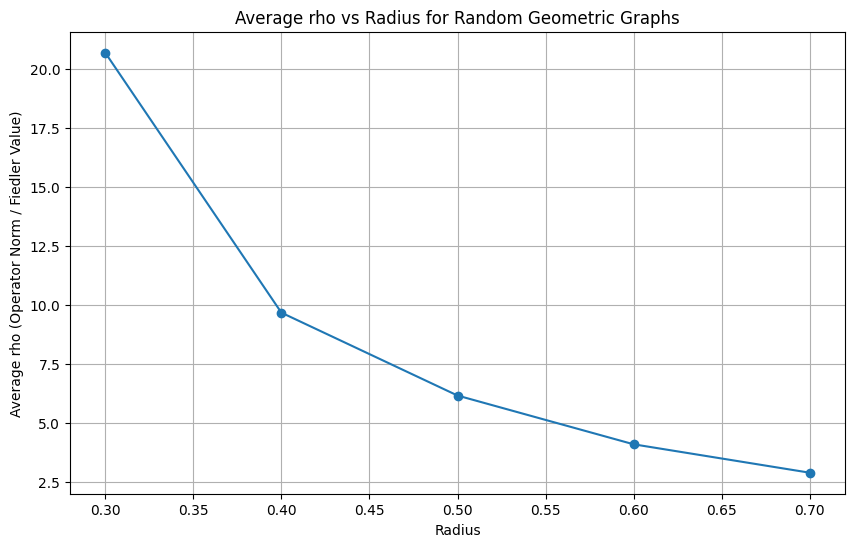

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.linalg import eigsh

# Function to generate a random geometric graph and compute its Laplacian matrix
def generate_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    L = nx.laplacian_matrix(G).astype(float).toarray()  # Ensure the matrix is of type float
    return L

# Function to compute the operator norm of a matrix
def compute_operator_norm(L):
    return np.linalg.norm(L, ord=2)

# Function to compute the Fiedler value of a matrix
def compute_fiedler_value(L, maxiter=10000):
    try:
        eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=maxiter)
        return eigenvalues[1]
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Function to run the experiment
def run_experiment(n, radius, num_trials=50, maxiter=10000):
    rhos = []
    for _ in range(num_trials):
        L = generate_random_geometric_graph(n, radius)
        operator_norm = compute_operator_norm(L)
        fiedler_value = compute_fiedler_value(L, maxiter)
        if fiedler_value is None:
            fiedler_value = compute_fiedler_value(L, maxiter * 2)  # Retry with more iterations
        if fiedler_value is not None:
            rho = operator_norm / fiedler_value
            rhos.append(rho)
    return np.mean(rhos) if rhos else None

# Parameters
n = 100
radius_values = np.linspace(0.3, 0.7, 5)  # Different radii for varying connectivity
num_trials = 50
maxiter = 10000

# Run experiments and collect results
results = []
for radius in radius_values:
    avg_rho = run_experiment(n, radius, num_trials, maxiter)
    if avg_rho is not None:
        results.append(avg_rho)
        print(f"Radius: {radius}, Average rho: {avg_rho}")
    else:
        results.append(0)  # Ensure results list has the same length as radius_values

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(radius_values, results, marker='o')
plt.xlabel('Radius')
plt.ylabel('Average rho (Operator Norm / Fiedler Value)')
plt.title('Average rho vs Radius for Random Geometric Graphs')
plt.grid(True)
plt.show()

#  Bound of Random Geometric Graphs with different Noise  

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.sparse.linalg import eigsh

# Function to generate a random geometric graph and compute its Laplacian matrix
def generate_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    L = nx.laplacian_matrix(G).astype(float).toarray()  # Ensure the matrix is of type float
    return L

# Function to compute the operator norm of a matrix
def compute_operator_norm(L):
    return np.linalg.norm(L, ord=2)

# Function to compute the Fiedler value of a matrix
def compute_fiedler_value(L, maxiter=10000):
    try:
        eigenvalues, _ = eigsh(L, k=2, which='SM', maxiter=maxiter)
        return eigenvalues[1]
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Function to run the experiment
def run_experiment(n, radius, sigma, num_trials=50, maxiter=10000):
    rhos = []
    fiedler_values = []
    for _ in range(num_trials):
        L = generate_random_geometric_graph(n, radius)
        L += np.random.normal(0, sigma, L.shape)  # Add Gaussian noise
        operator_norm = compute_operator_norm(L)
        fiedler_value = compute_fiedler_value(L, maxiter)
        if fiedler_value is None:
            fiedler_value = compute_fiedler_value(L, maxiter * 2)  # Retry with more iterations
        if fiedler_value is not None:
            rho = operator_norm / fiedler_value
            rhos.append(rho)
            fiedler_values.append(fiedler_value)
    avg_rho = np.mean(rhos) if rhos else None
    avg_fiedler_value = np.mean(fiedler_values) if fiedler_values else None
    return avg_rho, avg_fiedler_value

# Parameters
n = 1000
sigma_values = np.linspace(0.02, 2, 3)  # Different standard deviations for Gaussian noise
radius_values = np.linspace(0.05, 0.15, 3)  # Different radii for varying connectivity
num_trials = 30
maxiter = 10000

# Run experiments and collect results
results = {sigma: [] for sigma in sigma_values}
fiedler_results = {sigma: [] for sigma in sigma_values}
for sigma in sigma_values:
    for radius in radius_values:
        avg_rho, avg_fiedler_value = run_experiment(n, radius, sigma, num_trials, maxiter)
        if avg_rho is not None and avg_fiedler_value is not None:
            results[sigma].append(avg_rho)
            fiedler_results[sigma].append(avg_fiedler_value)
            print(f"Sigma: {sigma}, Radius: {radius}, Average rho: {avg_rho}, Average Fiedler value: {avg_fiedler_value}")
        else:
            results[sigma].append(0)  # Ensure results list has the same length as radius_values
            fiedler_results[sigma].append(0)

# Plot the results for rho
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(radius_values, results[sigma], marker='o', label=f'Sigma={sigma}')
plt.xlabel('Radius')
plt.ylabel('Average rho (Operator Norm / Fiedler Value)')
plt.title('Average rho vs Radius for Random Geometric Graphs with Different Sigma')
plt.legend()
plt.grid(True)
plt.show()

# Plot the results for Fiedler value
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(radius_values, fiedler_results[sigma], marker='o', label=f'Sigma={sigma}')
plt.xlabel('Radius')
plt.ylabel('Average Fiedler Value')
plt.title('Average Fiedler Value vs Radius for Random Geometric Graphs with Different Sigma')
plt.legend()
plt.grid(True)
plt.show()

Sigma: 0.02, Radius: 0.05, Average rho: -247.77352175802952, Average Fiedler value: 0.007946892549941801
Sigma: 0.02, Radius: 0.1, Average rho: 184.25825316125503, Average Fiedler value: 0.2777789964162349
Sigma: 0.02, Radius: 0.15, Average rho: 58.968473327568475, Average Fiedler value: 1.6259466291944653


KeyboardInterrupt: 